# Problem 1

a) We create the 3 x 3 matrix containing P_ij which is the probability of transitioning from the node i to j.

In [2]:
import numpy as np

matrix_p = np.array([[0.2, 0.7, 0.1],
                   [0.2, 0.5, 0.3],
                   [0.2, 0.4, 0.4]])

b) We simulate a single realization of the chain, setting i to be 10.

In [3]:
# Initial state
current_state = 0  # X_0 = 1 corresponds to the first row in the matrix (0-indexed)

# Simulate a single realization
num_steps = 10
realization = [current_state]

for _ in range(num_steps):
    # Choose the next state based on the transition probabilities
    next_state = np.random.choice(range(len(matrix_p[current_state])), p=matrix_p[current_state])
    
    # Update the current state
    current_state = next_state
    
    # Append the current state to the realization
    realization.append(current_state)

print("Single realization of the Markov chain:", realization)

Single realization of the Markov chain: [0, 0, 1, 2, 2, 2, 1, 2, 2, 2, 1]


# Problem 2

a) We try to analytically solve for the stationary state of the process.
We have the matrix multiplication pi.T P = pi.T. Suppose pi has vector [a, b, c].
Then the system of equations to solve for is:\
0.2a + 0.2b + 0.2c = a\
0.7a + 0.5b + 0.4c = b\
0.1a + 0.3b + 0.4c = c\
a + b + c = 1

This is the same as:\
-0.8a + 0.2b + 0.2c = 0\
0.7a - 0.5b + 0.4c = 0\
0.1a + 0.3b - 0.6c = 0\
a + b + c = 1

Now solving for each of a, b, and c gives us:
a = 0.2\
b = 23/45, around 0.5111\
c = 13/45, around 0.2889

b) Using below function that calculates the norm squared of the difference between pi_i and the stationary state we found in part a, we show that various initial conditions quickly converge to the stationary state.

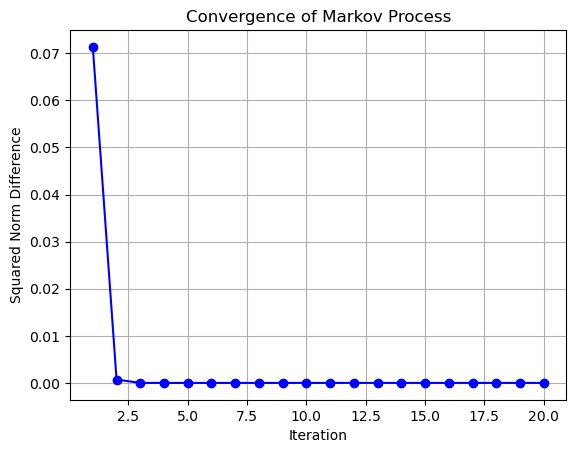

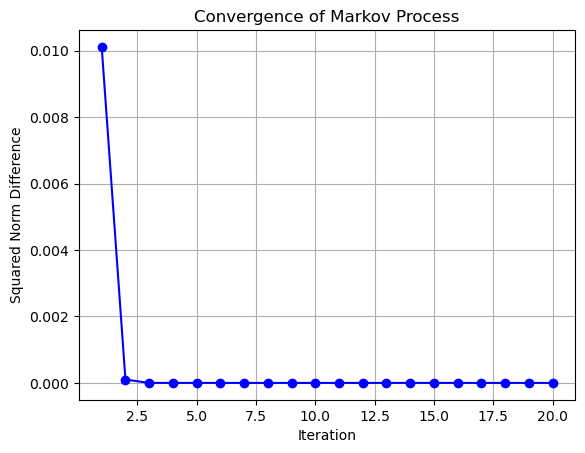

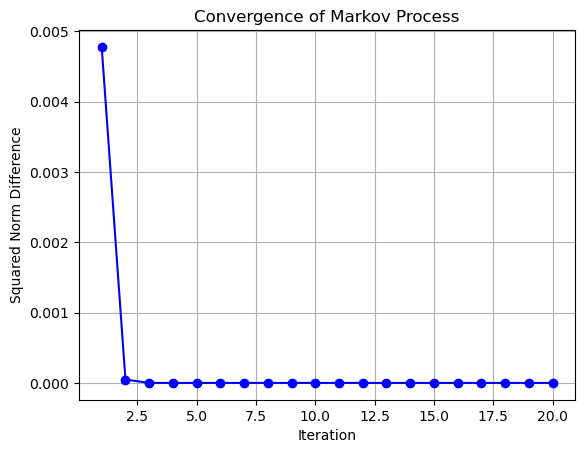

In [16]:
import matplotlib.pyplot as plt

matrix_conv = np.array([0.2, 23/45, 13/45])

def markov_converge(pi_0_mat, iter=20):
    diff = []
    for i in range(iter):
        pi_0_mat = pi_0_mat.T @ matrix_p
        diff.append(np.linalg.norm(pi_0_mat-matrix_conv)**2)
        
    plt.plot(range(1, iter + 1), diff, marker='o', linestyle='-', color='b')
    plt.xlabel('Iteration')
    plt.ylabel('Squared Norm Difference')
    plt.title('Convergence of Markov Process')
    plt.grid(True)
    plt.show()

# Starting from the node 1
matrix_1 = np.array([1,0,0])
markov_converge(matrix_1)

# Starting from another initial conditino
matrix_2 = np.array([0.1, 0.1, 0.8])
markov_converge(matrix_2)

# Starting from another initial conditino
matrix_3 = np.array([0.5, 0.1, 0.4])
markov_converge(matrix_3)

# Problem 3

a) We compute the mean and show histograms of the arrival times for both x_0 = 1 and x_0 = 2.

The mean of arrival time for:
x_0 = 1 is 4.5686
x_0 = 2 is 3.8605


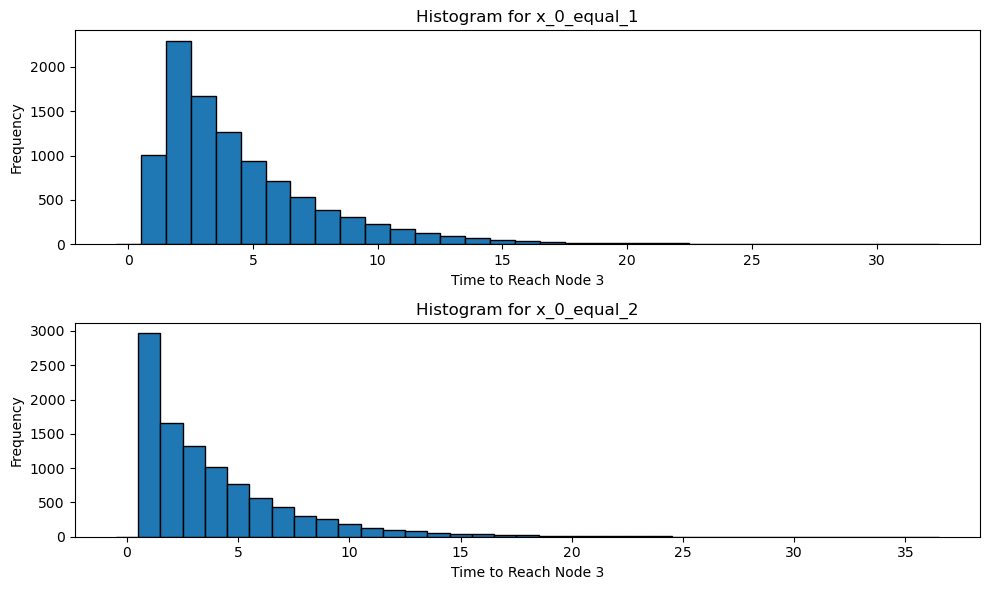

In [30]:
# Define function that returns the amount of time it takes to reach the node 3
def markov_chain_simul(initial_state):
    time = 0
    current_state = initial_state
    while current_state != 2:
        next_state = np.random.choice(range(len(matrix_p[current_state])), p=matrix_p[current_state])
        time += 1
        current_state = next_state
    return time

x_0_equal_1 = [markov_chain_simul(0) for _ in range(10000)]
x_0_equal_2 = [markov_chain_simul(1) for _ in range(10000)]

x_0_equal_1_mean = np.mean(x_0_equal_1)
x_0_equal_2_mean = np.mean(x_0_equal_2)

print("The mean of arrival time for:\nx_0 = 1 is {}\nx_0 = 2 is {}".format(x_0_equal_1_mean, x_0_equal_2_mean))

# Plot histograms
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.hist(x_0_equal_1, bins=np.arange(0, max(x_0_equal_1) + 1) - 0.5, edgecolor='black')
plt.title('Histogram for x_0_equal_1')
plt.xlabel('Time to Reach Node 3')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.hist(x_0_equal_2, bins=np.arange(0, max(x_0_equal_2) + 1) - 0.5, edgecolor='black')
plt.title('Histogram for x_0_equal_2')
plt.xlabel('Time to Reach Node 3')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

b) We theoretically compute the mean of the arrival times, using the following system of equations.
Mean arrival time for x_0 = 1: E(T_1) = 1 + 0.2(E(T_1)) + 0.7(E(T_2))
Mean arrival time for x_0 = 2: E(T_2) = 1 + 0.2(E(T_1)) + 0.5(E(T_2))

This is the same as:
1 - 0.8(E(T_1)) + 0.7(E(T_2)) = 0
1 + 0.2(E(T_1)) - 0.5(E(T_2)) = 0

5 - 1.3(E(T_2)) = 0
E(T_2) = 5 / 1.3, around 3.846

0.8(E(T_1)) = 1 + 3.5 / 1.3
E(T_1) = 4.8 / 1,04, around 4.615

Compared to the simulation we ran in part a, we see they are quite close.